# Prediction_Stock_Market- NIFTY_FTSE_NASDAQ

# EDA 

In [2]:
# Import libraries 

import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 

start='2018-09-17'
#start='2012-09-17'
end='2022-11-18'
df_nifty=data.DataReader('^NSEI','yahoo',start,end)

ma100_nifty=df_nifty.Close.rolling(100).mean()
ma200_nifty=df_nifty.Close.rolling(200).mean()
ma50_nifty=df_nifty.Close.rolling(50).mean()
ma20_nifty=df_nifty.Close.rolling(20).mean()
ma10_nifty=df_nifty.Close.rolling(10).mean()
ma3_nifty=df_nifty.Close.rolling(3).mean()

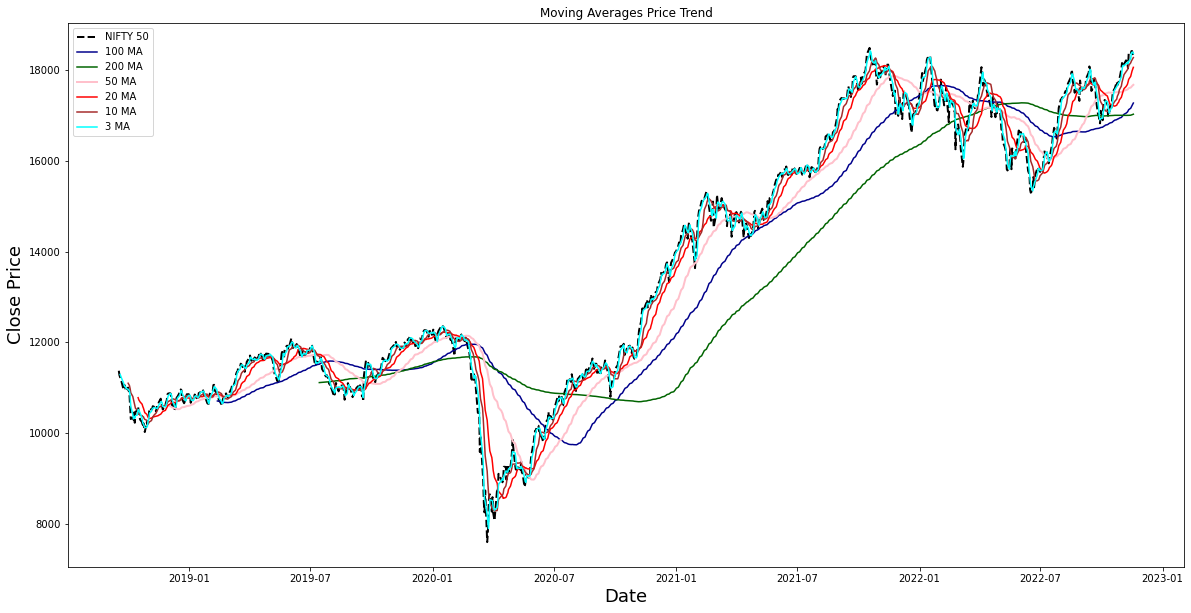

In [47]:
plt.figure(figsize=(20,10))


plt.plot(df_nifty.Close,'black',label='NIFTY 50',linestyle='dashed',linewidth=2)
plt.plot(ma100_nifty,'darkblue',label='100 MA')
plt.plot(ma200_nifty,'darkgreen',label='200 MA')
plt.plot(ma50_nifty,'pink',label='50 MA',linewidth=2)
plt.plot(ma20_nifty,'red',label='20 MA')
plt.plot(ma10_nifty,'brown',label='10 MA')
plt.plot(ma3_nifty,'cyan',label='3 MA')

plt.title('Moving Averages Price Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()

plt.show()

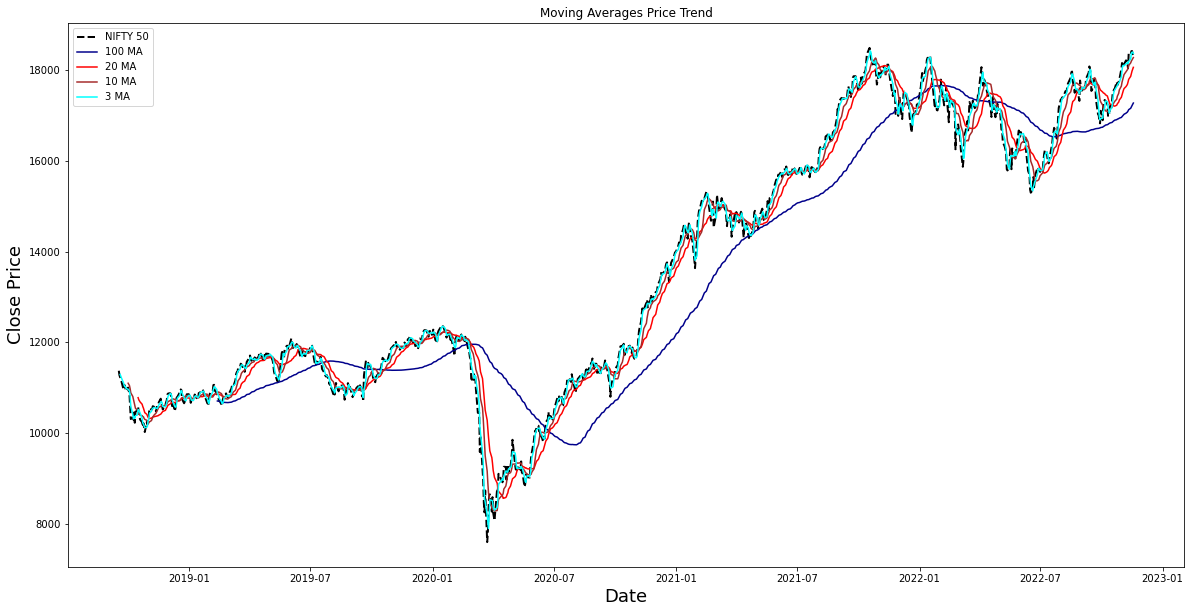

In [3]:
plt.figure(figsize=(20,10))


plt.plot(df_nifty.Close,'black',label='NIFTY 50',linestyle='dashed',linewidth=2)
plt.plot(ma100_nifty,'darkblue',label='100 MA')
#plt.plot(ma200_nifty,'darkgreen',label='200 MA')
#plt.plot(ma50_nifty,'pink',label='50 MA',linewidth=2)
plt.plot(ma20_nifty,'red',label='20 MA')
plt.plot(ma10_nifty,'brown',label='10 MA')
plt.plot(ma3_nifty,'cyan',label='3 MA')

plt.title('Moving Averages Price Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()

plt.show()

# NIFTY 50 (IND) PREDICTION

## 1. 200 DMA calcuation

In [1]:
# Import libraries 

import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 

start='2007-09-17'
#start='2012-09-17'
end='2022-11-18'
df=data.DataReader('^NSEI','yahoo',start,end)

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(200,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-200:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_200_days=df_train.tail(200)
final_df=past_200_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(200,input_data.shape[0]):
    x_test.append(input_data[i-200:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_200=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_200["Upper_Bound"]=final_pred_200["Closing_Price"]+interval
final_pred_200["Lower_Bound"]=final_pred_200["Closing_Price"]-interval


print(final_pred_200)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)

Epoch 1/3
2773/2773 [==============================] - 239s 81ms/step - loss: 0.0028
Epoch 2/3
2773/2773 [==============================] - 244s 88ms/step - loss: 4.0082e-04
Epoch 3/3
2773/2773 [==============================] - 211s 76ms/step - loss: 3.4145e-04
   Closing_Price   Upper_Bound   Lower_Bound
0   18035.154587  18692.998114  17377.311060
1   17752.382399  18410.225926  17094.538872
2   17488.531815  18146.375342  16830.688288
3   17267.692534  17925.536061  16609.849006
4   17096.280787  17754.124314  16438.437260
The Mean Squared Error is 0.022353
The Root Mean Squared Error is 0.022353


## 2. 100 DMA 

In [66]:
# Import libraries 

import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 

#start='2012-09-17'
start='2007-09-17'
end='2022-11-18'
df=data.DataReader('^NSEI','yahoo',start,end)

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(100,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_100_days=df_train.tail(100)
final_df=past_100_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_100=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_100["Upper_Bound"]=final_pred_100["Closing_Price"]+interval
final_pred_100["Lower_Bound"]=final_pred_100["Closing_Price"]-interval


print(final_pred_100)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)

Epoch 1/3
2873/2873 [==============================] - 171s 45ms/step - loss: 0.0018
Epoch 2/3
2873/2873 [==============================] - 123s 43ms/step - loss: 4.3910e-04
Epoch 3/3
2873/2873 [==============================] - 116s 41ms/step - loss: 3.0983e-04
   Closing_Price   Upper_Bound   Lower_Bound
0   18400.792432  18574.514168  18227.070697
1   18463.382767  18637.104502  18289.661031
2   18528.372873  18702.094609  18354.651138
3   18591.294189  18765.015924  18417.572453
4   18650.160828  18823.882563  18476.439093
The Mean Squared Error is 0.020814
The Root Mean Squared Error is 0.020814


## 3. 50 DMA 

In [3]:
# Import libraries 

import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 

start='2007-09-17'
#start='2012-09-17'
end='2022-11-18'
df=data.DataReader('^NSEI','yahoo',start,end)

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(50,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-50:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_50_days=df_train.tail(50)
final_df=past_50_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(50,input_data.shape[0]):
    x_test.append(input_data[i-50:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_50=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_50["Upper_Bound"]=final_pred_50["Closing_Price"]+interval
final_pred_50["Lower_Bound"]=final_pred_50["Closing_Price"]-interval


print(final_pred_50)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)

Epoch 1/3
2923/2923 [==============================] - 100s 27ms/step - loss: 0.00303s - lo
Epoch 2/3
2923/2923 [==============================] - 66s 22ms/step - loss: 4.2069e-04
Epoch 3/3
2923/2923 [==============================] - 65s 22ms/step - loss: 3.2116e-04
   Closing_Price   Upper_Bound   Lower_Bound
0   17988.845137  18851.670361  17126.019912
1   17612.718894  18475.544119  16749.893669
2   17262.872262  18125.697487  16400.047037
3   16975.344574  17838.169799  16112.519349
4   16759.762769  17622.587994  15896.937544
The Mean Squared Error is 0.024166
The Root Mean Squared Error is 0.024166


## 4. 20 DMA 

In [67]:
# Import libraries 

import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 

start='2007-09-17'
#start='2012-09-17'
end='2022-11-18'
df=data.DataReader('^NSEI','yahoo',start,end)

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(20,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-20:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_20_days=df_train.tail(20)
final_df=past_20_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(20,input_data.shape[0]):
    x_test.append(input_data[i-20:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_20=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_20["Upper_Bound"]=final_pred_20["Closing_Price"]+interval
final_pred_20["Lower_Bound"]=final_pred_20["Closing_Price"]-interval


print(final_pred_20)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)

Epoch 1/3
2953/2953 [==============================] - 45s 12ms/step - loss: 0.0025
Epoch 2/3
2953/2953 [==============================] - 35s 12ms/step - loss: 3.7139e-04
Epoch 3/3
2953/2953 [==============================] - 37s 13ms/step - loss: 3.2038e-04
   Closing_Price   Upper_Bound   Lower_Bound
0   18470.805544  18823.780682  18117.830406
1   18617.878872  18970.854010  18264.903734
2   18758.035933  19111.011071  18405.060795
3   18877.371650  19230.346788  18524.396513
4   18975.765550  19328.740688  18622.790412
The Mean Squared Error is 0.021302
The Root Mean Squared Error is 0.021302


## 5. 10 DMA 

In [68]:
# Import libraries 

import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 

start='2007-09-17'
#start='2012-09-17'
end='2022-11-18'
df=data.DataReader('^NSEI','yahoo',start,end)

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(10,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-10:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_10_days=df_train.tail(10)
final_df=past_10_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(10,input_data.shape[0]):
    x_test.append(input_data[i-10:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_10=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_10["Upper_Bound"]=final_pred_10["Closing_Price"]+interval
final_pred_10["Lower_Bound"]=final_pred_10["Closing_Price"]-interval


print(final_pred_10)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)

Epoch 1/3
2963/2963 [==============================] - 51s 9ms/step - loss: 0.0019
Epoch 2/3
2963/2963 [==============================] - 24s 8ms/step - loss: 5.0145e-04
Epoch 3/3
2963/2963 [==============================] - 23s 8ms/step - loss: 3.2196e-04
   Closing_Price   Upper_Bound   Lower_Bound
0   18506.430989  18892.266278  18120.595699
1   18674.777763  19060.613052  18288.942473
2   18825.035241  19210.870531  18439.199952
3   18952.398699  19338.233989  18566.563409
4   19060.999241  19446.834531  18675.163951
The Mean Squared Error is 0.021957
The Root Mean Squared Error is 0.021957


## 6. 5 DMA 

In [69]:
# Import libraries 

import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 

start='2007-09-17'
#start='2012-09-17'
end='2022-11-18'
df=data.DataReader('^NSEI','yahoo',start,end)

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(5,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-5:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_5_days=df_train.tail(5)
final_df=past_5_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(5,input_data.shape[0]):
    x_test.append(input_data[i-5:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_5=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_5["Upper_Bound"]=final_pred_5["Closing_Price"]+interval
final_pred_5["Lower_Bound"]=final_pred_5["Closing_Price"]-interval


print(final_pred_5)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)

Epoch 1/3
2968/2968 [==============================] - 40s 8ms/step - loss: 0.0044
Epoch 2/3
2968/2968 [==============================] - 15s 5ms/step - loss: 4.4538e-04
Epoch 3/3
2968/2968 [==============================] - 17s 6ms/step - loss: 4.0629e-04
   Closing_Price   Upper_Bound   Lower_Bound
0   18174.209890  18340.196982  18008.222799
1   18116.587506  18282.574597  17950.600414
2   18066.286207  18232.273299  17900.299115
3   18003.042979  18169.030071  17837.055888
4   17932.164525  18098.151616  17766.177433
The Mean Squared Error is 0.022972
The Root Mean Squared Error is 0.022972


# 7. 3 DMA

In [70]:
# Import libraries 

import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 

start='2007-09-17'
#start='2012-09-17'
end='2022-11-18'
df=data.DataReader('^NSEI','yahoo',start,end)

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(3,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-3:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_3_days=df_train.tail(3)
final_df=past_3_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(3,input_data.shape[0]):
    x_test.append(input_data[i-3:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_3=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_3["Upper_Bound"]=final_pred_3["Closing_Price"]+interval
final_pred_3["Lower_Bound"]=final_pred_3["Closing_Price"]-interval


print(final_pred_3)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)

Epoch 1/3
2970/2970 [==============================] - 41s 6ms/step - loss: 0.0042
Epoch 2/3
2970/2970 [==============================] - 14s 5ms/step - loss: 4.7284e-04
Epoch 3/3
2970/2970 [==============================] - 14s 5ms/step - loss: 3.9639e-04
   Closing_Price   Upper_Bound   Lower_Bound
0   17942.623127  18429.348017  17455.898237
1   17811.566417  18298.291307  17324.841527
2   17633.801265  18120.526156  17147.076375
3   17419.257743  17905.982633  16932.532852
4   17263.294570  17750.019461  16776.569680
The Mean Squared Error is 0.030254
The Root Mean Squared Error is 0.030254


## Final Prediction values  based on 100, 20,10, 3 DMA 

In [71]:

list_of_df = [final_pred_100,final_pred_20,final_pred_10,final_pred_3]
print (sum(list_of_df)/len(list_of_df))


   Closing_Price   Upper_Bound   Lower_Bound
0   18330.163023  18679.977286  17980.348760
1   18391.901454  18741.715718  18042.087191
2   18436.311328  18786.125592  18086.497065
3   18460.080570  18809.894833  18110.266307
4   18487.555047  18837.369311  18137.740784


# FTSE 50 (UK) PREDICTION

# EDA

In [52]:
import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 
# https://stackoverflow.com/questions/64339361/i-cant-seem-to-use-ftse-symbol-from-yahoo-finance-when-importing-the-index-int

df=pd.read_csv("HistoricalPrices_Phase2.csv").set_index("Date")

# Keep index as datetime index
df.index = pd.to_datetime(df.index)

# Sort the dataframe by date
df=df.sort_index(axis = 0)

# Rename the column name
df=df.rename(columns={" Close":"Close"})

In [55]:
df=df.tail(1000)

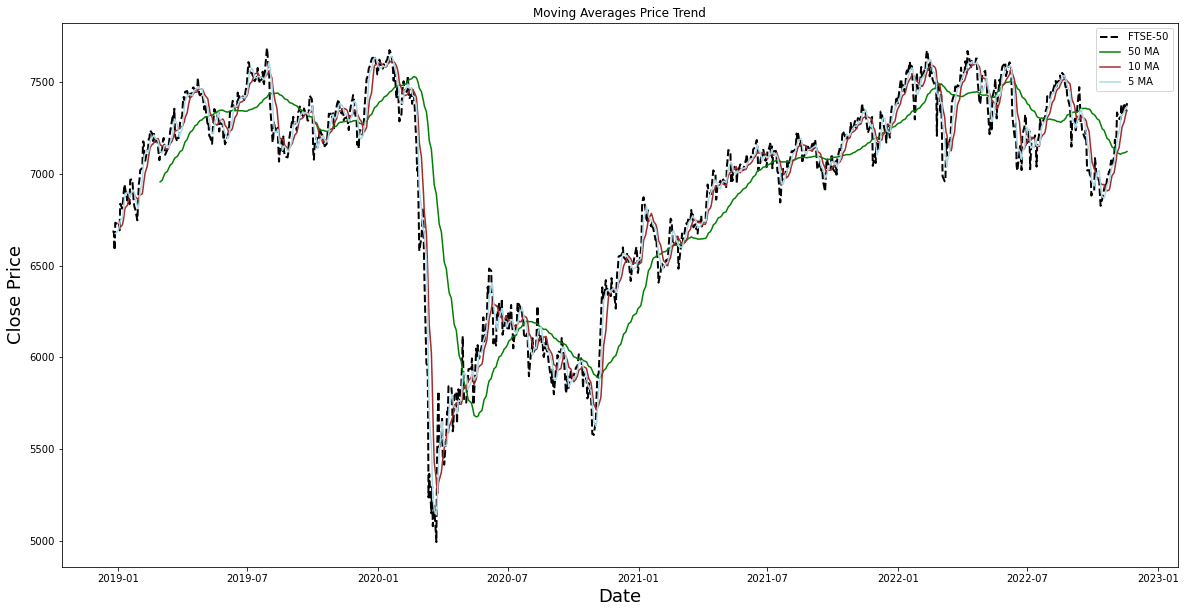

In [67]:
ma100_ftse=df.Close.rolling(100).mean()
ma200_ftse=df.Close.rolling(200).mean()
ma50_ftse=df.Close.rolling(50).mean()
ma20_ftse=df.Close.rolling(20).mean()
ma10_ftse=df.Close.rolling(10).mean()
ma5_ftse=df.Close.rolling(5).mean()

plt.figure(figsize=(20,10))


plt.plot(df.Close,'black',label='FTSE-50',linestyle='dashed',linewidth=2)
#plt.plot(ma100_ftse,'darkblue',label='100 MA')
#plt.plot(ma200_ftse,'darkgreen',label='200 MA')
plt.plot(ma50_ftse,'green',label='50 MA')
#plt.plot(ma20_ftse,'red',label='20 MA')
plt.plot(ma10_ftse,'brown',label='10 MA')
plt.plot(ma5_ftse,'lightblue',label='5 MA')

plt.title('Moving Averages Price Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()

plt.show()

## 1. 200 DMA 

In [89]:
import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 
# https://stackoverflow.com/questions/64339361/i-cant-seem-to-use-ftse-symbol-from-yahoo-finance-when-importing-the-index-int

df=pd.read_csv("HistoricalPrices_Phase2.csv").set_index("Date")

# Keep index as datetime index
df.index = pd.to_datetime(df.index)

# Sort the dataframe by date
df=df.sort_index(axis = 0)

# Rename the column name
df=df.rename(columns={" Close":"Close"})

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(200,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-200:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_200_days=df_train.tail(200)
final_df=past_200_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(200,input_data.shape[0]):
    x_test.append(input_data[i-200:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_200=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_200["Upper_Bound"]=final_pred_200["Closing_Price"]+interval
final_pred_200["Lower_Bound"]=final_pred_200["Closing_Price"]-interval


print(final_pred_200)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)

Epoch 1/3
4501/4501 [==============================] - 474s 89ms/step - loss: 0.00280s - los
Epoch 2/3
4501/4501 [==============================] - 411s 91ms/step - loss: 4.7398e-040s - loss: 4.7399
Epoch 3/3
4501/4501 [==============================] - 426s 95ms/step - loss: 4.0779e-04
   Closing_Price  Upper_Bound  Lower_Bound
0    7275.228731  7467.641270  7082.816193
1    7197.811719  7390.224258  7005.399181
2    7125.506227  7317.918766  6933.093689
3    7059.128311  7251.540849  6866.715772
4    6997.864665  7190.277203  6805.452126
The Mean Squared Error is 0.034409
The Root Mean Squared Error is 0.034409


## 2. 100 DMA 

In [90]:
import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

df=pd.read_csv("HistoricalPrices_Phase2.csv").set_index("Date")

# Keep index as datetime index
df.index = pd.to_datetime(df.index)

# Sort the dataframe by date
df=df.sort_index(axis = 0)

# Rename the column name
df=df.rename(columns={" Close":"Close"})

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(100,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_100_days=df_train.tail(100)
final_df=past_100_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_100=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_100["Upper_Bound"]=final_pred_100["Closing_Price"]+interval
final_pred_100["Lower_Bound"]=final_pred_100["Closing_Price"]-interval


print(final_pred_100)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)

Epoch 1/3
4601/4601 [==============================] - 276s 54ms/step - loss: 0.0024
Epoch 2/3
4601/4601 [==============================] - 214s 46ms/step - loss: 4.3770e-04
Epoch 3/3
4601/4601 [==============================] - 242s 53ms/step - loss: 4.4026e-04
   Closing_Price  Upper_Bound  Lower_Bound
0    7291.057771  7420.070810  7162.044732
1    7239.881041  7368.894080  7110.868002
2    7192.594841  7321.607879  7063.581802
3    7147.698886  7276.711925  7018.685847
4    7104.562917  7233.575956  6975.549878
The Mean Squared Error is 0.030779
The Root Mean Squared Error is 0.030779


## 3. 50 DMA 

In [91]:
import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

df=pd.read_csv("HistoricalPrices_Phase2.csv").set_index("Date")

# Keep index as datetime index
df.index = pd.to_datetime(df.index)

# Sort the dataframe by date
df=df.sort_index(axis = 0)

# Rename the column name
df=df.rename(columns={" Close":"Close"})

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(50,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-50:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_50_days=df_train.tail(50)
final_df=past_50_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(50,input_data.shape[0]):
    x_test.append(input_data[i-50:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_50=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_50["Upper_Bound"]=final_pred_50["Closing_Price"]+interval
final_pred_50["Lower_Bound"]=final_pred_50["Closing_Price"]-interval


print(final_pred_50)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)

Epoch 1/3
4651/4651 [==============================] - 172s 29ms/step - loss: 0.0041
Epoch 2/3
4651/4651 [==============================] - 134s 29ms/step - loss: 5.6597e-04
Epoch 3/3
4651/4651 [==============================] - 123s 26ms/step - loss: 4.2145e-04
   Closing_Price  Upper_Bound  Lower_Bound
0    7320.254106  7369.607307  7270.900905
1    7298.951580  7348.304782  7249.598379
2    7280.043425  7329.396626  7230.690224
3    7263.655281  7313.008482  7214.302079
4    7249.137292  7298.490493  7199.784091
The Mean Squared Error is 0.027073
The Root Mean Squared Error is 0.027073


## 4.20 DMA 

In [92]:
import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error


df=pd.read_csv("HistoricalPrices_Phase2.csv").set_index("Date")

# Keep index as datetime index
df.index = pd.to_datetime(df.index)

# Sort the dataframe by date
df=df.sort_index(axis = 0)

# Rename the column name
df=df.rename(columns={" Close":"Close"})

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(20,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-20:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_20_days=df_train.tail(20)
final_df=past_20_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(20,input_data.shape[0]):
    x_test.append(input_data[i-20:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_20=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_20["Upper_Bound"]=final_pred_20["Closing_Price"]+interval
final_pred_20["Lower_Bound"]=final_pred_20["Closing_Price"]-interval


print(final_pred_20)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)

Epoch 1/3
4681/4681 [==============================] - 83s 14ms/step - loss: 0.0041
Epoch 2/3
4681/4681 [==============================] - 53s 11ms/step - loss: 4.9129e-04
Epoch 3/3
4681/4681 [==============================] - 55s 12ms/step - loss: 4.2786e-04
   Closing_Price  Upper_Bound  Lower_Bound
0    7230.669477  7458.462562  7002.876392
1    7129.870097  7357.663182  6902.077012
2    7044.202810  7271.995895  6816.409725
3    6968.781250  7196.574335  6740.988166
4    6901.634372  7129.427457  6673.841287
The Mean Squared Error is 0.042458
The Root Mean Squared Error is 0.042458


## 5. 10 DMA 

In [93]:
import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error


df=pd.read_csv("HistoricalPrices_Phase2.csv").set_index("Date")

# Keep index as datetime index
df.index = pd.to_datetime(df.index)

# Sort the dataframe by date
df=df.sort_index(axis = 0)

# Rename the column name
df=df.rename(columns={" Close":"Close"})


# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(10,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-10:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_10_days=df_train.tail(10)
final_df=past_10_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(10,input_data.shape[0]):
    x_test.append(input_data[i-10:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_10=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_10["Upper_Bound"]=final_pred_10["Closing_Price"]+interval
final_pred_10["Lower_Bound"]=final_pred_10["Closing_Price"]-interval


print(final_pred_10)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)

Epoch 1/3
4691/4691 [==============================] - 48s 8ms/step - loss: 0.0027
Epoch 2/3
4691/4691 [==============================] - 34s 7ms/step - loss: 5.0455e-04
Epoch 3/3
4691/4691 [==============================] - 34s 7ms/step - loss: 4.3349e-04
   Closing_Price  Upper_Bound  Lower_Bound
0    7387.039879  7553.302317  7220.777440
1    7432.505422  7598.767860  7266.242984
2    7488.856578  7655.119016  7322.594140
3    7553.997176  7720.259615  7387.734738
4    7625.118116  7791.380554  7458.855678
The Mean Squared Error is 0.030916
The Root Mean Squared Error is 0.030916


## 6. 5 DMA 

In [94]:
import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error


df=pd.read_csv("HistoricalPrices_Phase2.csv").set_index("Date")

# Keep index as datetime index
df.index = pd.to_datetime(df.index)

# Sort the dataframe by date
df=df.sort_index(axis = 0)

# Rename the column name
df=df.rename(columns={" Close":"Close"})

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(5,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-5:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_5_days=df_train.tail(5)
final_df=past_5_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(5,input_data.shape[0]):
    x_test.append(input_data[i-5:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_5=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_5["Upper_Bound"]=final_pred_5["Closing_Price"]+interval
final_pred_5["Lower_Bound"]=final_pred_5["Closing_Price"]-interval


print(final_pred_5)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)

Epoch 1/3
4696/4696 [==============================] - 43s 7ms/step - loss: 0.0034
Epoch 2/3
4696/4696 [==============================] - 26s 6ms/step - loss: 5.8352e-04
Epoch 3/3
4696/4696 [==============================] - 26s 5ms/step - loss: 4.3303e-04
   Closing_Price  Upper_Bound  Lower_Bound
0    7335.945819  7353.840318  7318.051320
1    7329.289156  7347.183655  7311.394657
2    7322.750398  7340.644897  7304.855899
3    7316.271108  7334.165607  7298.376609
4    7310.180253  7328.074752  7292.285754
The Mean Squared Error is 0.028664
The Root Mean Squared Error is 0.028664


## Final Prediction values based on 200, 100, 50, 20,10, 5 DMA

In [114]:
#list_of_df = [final_pred_100,final_pred_50,final_pred_20,final_pred_10,final_pred_5]
list_of_df = [final_pred_50,final_pred_10,final_pred_5]
sum(list_of_df)/len(list_of_df)

,Closing_Price,Upper_Bound,Lower_Bound
0,7347.746601,7425.583314,7269.909889
1,7353.582053,7431.418766,7275.745340
2,7363.883467,7441.720180,7286.046754
3,7377.974522,7455.811235,7300.137809
4,7394.811887,7472.648600,7316.975174


# NASDAQ 100 (US) PREDICTION

# EDA 

In [63]:
import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 
start='2017-11-10'
end='2022-11-18'
df_us=data.DataReader('^NDX','yahoo',start,end)


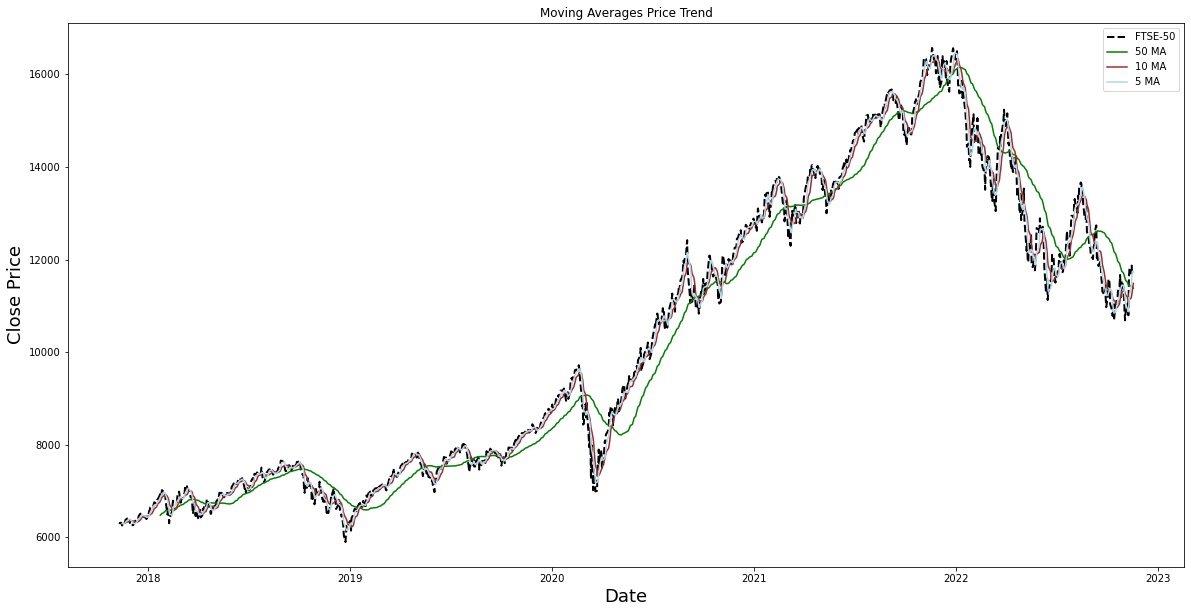

In [66]:
ma100_us=df_us.Close.rolling(100).mean()
ma200_us=df_us.Close.rolling(200).mean()
ma50_us=df_us.Close.rolling(50).mean()
ma20_us=df_us.Close.rolling(20).mean()
ma10_us=df_us.Close.rolling(10).mean()
ma5_us=df_us.Close.rolling(5).mean()

plt.figure(figsize=(20,10))


plt.plot(df_us.Close,'black',label='FTSE-50',linestyle='dashed',linewidth=2)
#plt.plot(ma100_us,'darkblue',label='100 MA')
#plt.plot(ma200_us,'darkgreen',label='200 MA')
plt.plot(ma50_us,'green',label='50 MA')
#plt.plot(ma20_us,'red',label='20 MA')
plt.plot(ma10_us,'brown',label='10 MA')
plt.plot(ma5_us,'lightblue',label='5 MA')

plt.title('Moving Averages Price Trend')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.legend()


## 1. 200 DMA 

In [16]:
import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 
start='2012-11-10'
end='2022-11-18'
df=data.DataReader('^NDX','yahoo',start,end)

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(200,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-200:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_200_days=df_train.tail(200)
final_df=past_200_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(200,input_data.shape[0]):
    x_test.append(input_data[i-200:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_200=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_200["Upper_Bound"]=final_pred_200["Closing_Price"]+interval
final_pred_200["Lower_Bound"]=final_pred_200["Closing_Price"]-interval


print(final_pred_200)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)

Epoch 1/3
1820/1820 [==============================] - 208s 106ms/step - loss: 0.0038
Epoch 2/3
1820/1820 [==============================] - 190s 105ms/step - loss: 6.8505e-04
Epoch 3/3
1820/1820 [==============================] - 191s 105ms/step - loss: 3.3551e-04
   Closing_Price   Upper_Bound   Lower_Bound
0   11644.548530  11762.166398  11526.930662
1   11590.968319  11708.586187  11473.350451
2   11543.578982  11661.196850  11425.961115
3   11505.311237  11622.929105  11387.693369
4   11476.692645  11594.310513  11359.074777
The Mean Squared Error is 0.031768
The Root Mean Squared Error is 0.031768


## 2. 100 DMA 

In [17]:
import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 
start='2012-11-10'
end='2022-11-18'
df=data.DataReader('^NDX','yahoo',start,end)

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(100,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_100_days=df_train.tail(100)
final_df=past_100_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_100=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_100["Upper_Bound"]=final_pred_100["Closing_Price"]+interval
final_pred_100["Lower_Bound"]=final_pred_100["Closing_Price"]-interval


print(final_pred_100)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)


Epoch 1/3
1920/1920 [==============================] - 96s 41ms/step - loss: 0.0022
Epoch 2/3
1920/1920 [==============================] - 76s 39ms/step - loss: 6.2976e-04
Epoch 3/3
1920/1920 [==============================] - 85s 44ms/step - loss: 5.1411e-04
   Closing_Price   Upper_Bound   Lower_Bound
0   11724.236133  11745.207972  11703.264294
1   11700.527259  11721.499099  11679.555420
2   11696.532887  11717.504727  11675.561048
3   11703.530625  11724.502464  11682.558786
4   11718.163978  11739.135817  11697.192139
The Mean Squared Error is 0.042980
The Root Mean Squared Error is 0.042980


## 3. 50 DMA 

In [18]:
import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 
start='2012-11-10'
end='2022-11-18'
df=data.DataReader('^NDX','yahoo',start,end)

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(50,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-50:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_50_days=df_train.tail(50)
final_df=past_50_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(50,input_data.shape[0]):
    x_test.append(input_data[i-50:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_50=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_50["Upper_Bound"]=final_pred_50["Closing_Price"]+interval
final_pred_50["Lower_Bound"]=final_pred_50["Closing_Price"]-interval


print(final_pred_50)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)


Epoch 1/3
1970/1970 [==============================] - 69s 27ms/step - loss: 0.0031
Epoch 2/3
1970/1970 [==============================] - 51s 26ms/step - loss: 5.4705e-04 0s - los
Epoch 3/3
1970/1970 [==============================] - 52s 27ms/step - loss: 5.8284e-04
   Closing_Price   Upper_Bound   Lower_Bound
0   11651.771482  11721.468139  11582.074825
1   11610.130250  11679.826908  11540.433593
2   11580.489714  11650.186371  11510.793057
3   11562.411487  11632.108144  11492.714830
4   11554.407196  11624.103853  11484.710539
The Mean Squared Error is 0.042243
The Root Mean Squared Error is 0.042243


## 4. 20 DMA

In [19]:
import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 
start='2012-11-10'
end='2022-11-18'
df=data.DataReader('^NDX','yahoo',start,end)

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(20,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-20:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_20_days=df_train.tail(20)
final_df=past_20_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(20,input_data.shape[0]):
    x_test.append(input_data[i-20:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_20=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_20["Upper_Bound"]=final_pred_20["Closing_Price"]+interval
final_pred_20["Lower_Bound"]=final_pred_20["Closing_Price"]-interval


print(final_pred_20)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)




Epoch 1/3
2000/2000 [==============================] - 58s 15ms/step - loss: 0.0049
Epoch 2/3
2000/2000 [==============================] - 22s 11ms/step - loss: 5.0899e-04
Epoch 3/3
2000/2000 [==============================] - 26s 13ms/step - loss: 5.6659e-04
   Closing_Price   Upper_Bound   Lower_Bound
0   11560.397857  11823.327911  11297.467803
1   11457.138371  11720.068425  11194.208317
2   11354.941057  11617.871111  11092.011003
3   11262.612994  11525.543048  10999.682939
4   11184.082561  11447.012615  10921.152507
The Mean Squared Error is 0.049134
The Root Mean Squared Error is 0.049134


## 5. 10 DMA 

In [20]:
import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 
start='2012-11-10'
end='2022-11-18'
df=data.DataReader('^NDX','yahoo',start,end)



# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(10,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-10:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_10_days=df_train.tail(10)
final_df=past_10_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(10,input_data.shape[0]):
    x_test.append(input_data[i-10:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_10=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_10["Upper_Bound"]=final_pred_10["Closing_Price"]+interval
final_pred_10["Lower_Bound"]=final_pred_10["Closing_Price"]-interval


print(final_pred_10)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)


Epoch 1/3
2010/2010 [==============================] - 36s 9ms/step - loss: 0.0051
Epoch 2/3
2010/2010 [==============================] - 16s 8ms/step - loss: 5.5524e-04
Epoch 3/3
2010/2010 [==============================] - 14s 7ms/step - loss: 4.2957e-04
   Closing_Price   Upper_Bound   Lower_Bound
0   11630.450286  11639.741516  11621.159055
1   11626.716948  11636.008179  11617.425718
2   11625.240234  11634.531464  11615.949003
3   11627.901581  11637.192812  11618.610351
4   11638.633753  11647.924984  11629.342523
The Mean Squared Error is 0.050732
The Root Mean Squared Error is 0.050732


## 6. 5 DMA 

In [21]:
import yfinance as finance
import pandas as pd
import numpy as np
import pandas_datareader as data
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout,LSTM
from keras.models import Sequential
from math import sqrt
from sklearn.metrics import mean_squared_error

# Read the data from yahoo finance 
start='2012-11-10'
end='2022-11-18'
df=data.DataReader('^NDX','yahoo',start,end)

# Split the data - Test and Train

df_train=pd.DataFrame(df["Close"][0:int(len(df)*0.80)])
df_test=pd.DataFrame(df["Close"][int(len(df)*0.80):int(len(df))])

# Standardisation of values #Scale the data

Scaler=MinMaxScaler(feature_range=(0,1))
df_train_array=Scaler.fit_transform(df_train)

#Create the scaled training data set

x_train=[]
y_train=[]

#for i in range(100,df_train_array.shape[0]):
for i in range(5,df_train_array.shape[0]):
    #x_train.append(df_train_array[i-100:i]) #  #Will conaint 100 values (0-99)
    x_train.append(df_train_array[i-5:i]) #  #Will conaint 100 values (0-99)
    y_train.append(df_train_array[i,0])  #Will contain the 101 th value (100)
    
x_train,y_train =np.array(x_train),np.array(y_train)

#Build the LSTM model

model=Sequential()

model.add(LSTM(units=50,activation='relu',return_sequences=True,
              input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=3)

#Create the testing data set
#Tate last 100 days of train data for refercne for test data

#past_100_days=df_train.tail(100)
#final_df=past_100_days.append(df_test,ignore_index=True)

past_5_days=df_train.tail(5)
final_df=past_5_days.append(df_test,ignore_index=True)

#Convert the data to a numpy array
input_data=Scaler.fit_transform(final_df)

#Create the data set x_test and y_test
x_test=[]
y_test=[]

for i in range(5,input_data.shape[0]):
    x_test.append(input_data[i-5:i])
    y_test.append(input_data[i,0])
    
x_test,y_test =np.array(x_test),np.array(y_test)

# making predictions
y_predicted=model.predict(x_test)

#y_predicted = Scaler.inverse_transform(y_predicted)
y_predicted_inversed = Scaler.inverse_transform(y_predicted)

# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])

# Convert the dataframe to a numpy array
dataset = data.values

# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

new_df =pd.DataFrame(df["Close"].copy(), columns=["Close"])

train_size = int(len(new_df)*0.8)

#Get the model's predicted price values for the x_future next 5 days

X_FUTURE = 5
predictions = np.array([])
last = x_test[-1]
for i in range(X_FUTURE):
    curr_prediction = model.predict(np.array([last]))
    #print(curr_prediction)
    last = np.concatenate([last[1:], curr_prediction])
    predictions = np.concatenate([predictions, curr_prediction[0]])
predictions = Scaler.inverse_transform([predictions])[0]

#final_pred=pd.DataFrame(data=predictions,columns=prediction)
final_pred_5=pd.DataFrame({'Closing_Price':predictions })

# # calculate 95% gaussian prediction interval
# interval = 1.96 * predictions.std()
# lower, upper = predictions.mean() - interval, predictions.mean() + interval

# #return lower, predictions.mean(), upper
# final_pred["lower"]=predictions.mean() - interval
# final_pred["upper"]=predictions.mean() + interval

# calculate 95% gaussian prediction interval
interval = 1.96 * predictions.std()
#lower, upper = predictions.mean() - interval, predictions.mean() + interval

#return lower, predictions.mean(), upper
#final_pred["lower"]=predictions.mean() - interval
#final_pred["upper"]=predictions.mean() + interval
final_pred_5["Upper_Bound"]=final_pred_5["Closing_Price"]+interval
final_pred_5["Lower_Bound"]=final_pred_5["Closing_Price"]-interval


print(final_pred_5)


# Mean Squared Error
mse= mean_squared_error(y_test, y_predicted,squared=False)
print("The Mean Squared Error is %f" %mse)

# Root Mean Squared Error
rmse = sqrt(mean_squared_error(y_test, y_predicted))
print("The Root Mean Squared Error is %f" %rmse)


Epoch 1/3
2015/2015 [==============================] - 46s 9ms/step - loss: 0.0064
Epoch 2/3
2015/2015 [==============================] - 19s 9ms/step - loss: 4.8745e-04
Epoch 3/3
2015/2015 [==============================] - 17s 9ms/step - loss: 8.4043e-04
   Closing_Price   Upper_Bound   Lower_Bound
0   11662.936605  11755.062224  11570.810987
1   11630.274265  11722.399883  11538.148647
2   11608.278966  11700.404584  11516.153348
3   11561.567237  11653.692855  11469.441619
4   11531.969654  11624.095272  11439.844035
The Mean Squared Error is 0.050966
The Root Mean Squared Error is 0.050966


# Final Prediction values based on 200, 100, 50, 20,10, 5 DMA

In [36]:
list_of_df = [final_pred_50,final_pred_10,final_pred_5]
sum(list_of_df)/len(list_of_df)

,Closing_Price,Upper_Bound,Lower_Bound
0,11648.386124,11705.423960,11591.348289
1,11622.373821,11679.411657,11565.335986
2,11604.669638,11661.707473,11547.631803
3,11583.960102,11640.997937,11526.922266
4,11575.003534,11632.041370,11517.965699
